In [1]:
Decision Tree
statistical modelling that uses a form of tree where nodes are split based on information metric


when boostrap = True only then oob-score = True otherwise there will be warnings

Bagging = Bootstrap + Aggregated Data




SyntaxError: invalid syntax (2114647177.py, line 1)

In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("penguins_size.csv")

In [4]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [5]:
df.shape

(344, 7)

## Basic EDA

In [6]:
df.info() #2 missing in column 2,3,4,5

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [7]:
df.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [8]:
df=df.dropna()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            334 non-null    object 
 1   island             334 non-null    object 
 2   culmen_length_mm   334 non-null    float64
 3   culmen_depth_mm    334 non-null    float64
 4   flipper_length_mm  334 non-null    float64
 5   body_mass_g        334 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.9+ KB


In [10]:
df['sex'].unique()

array(['MALE', 'FEMALE', '.'], dtype=object)

In [11]:
df['sex'].value_counts()

MALE      168
FEMALE    165
.           1
Name: sex, dtype: int64

In [12]:
df['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [13]:
df=df[df['sex']!='.']

<AxesSubplot:xlabel='culmen_length_mm', ylabel='culmen_depth_mm'>

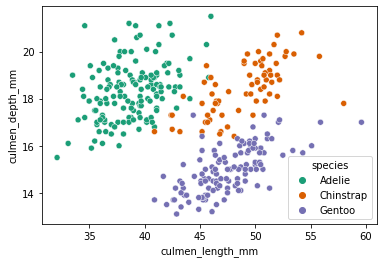

In [14]:
sns.scatterplot(x='culmen_length_mm',y='culmen_depth_mm',data=df,hue='species',palette='Dark2')

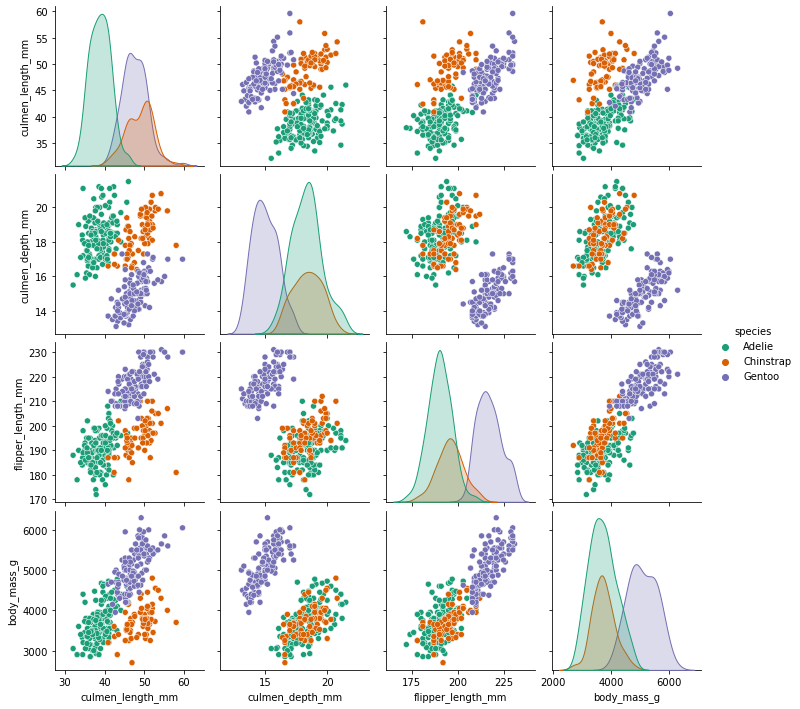

In [15]:
sns.pairplot(data=df,hue='species',palette='Dark2')

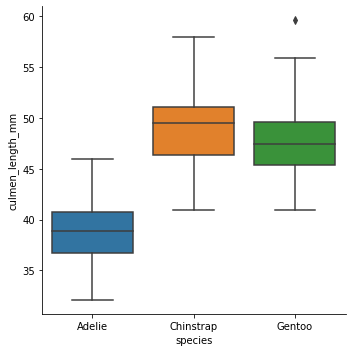

In [16]:
sns.catplot(x='species',y='culmen_length_mm',data=df,kind='box')

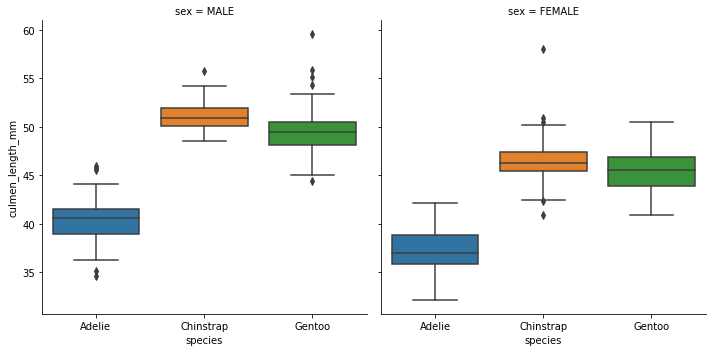

In [17]:
sns.catplot(x='species',y='culmen_length_mm',data=df,kind='box',col='sex')

## Feature Engineering 

In [18]:
pd.get_dummies(df)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,1,0,0,0,0,1,0,1
1,39.5,17.4,186.0,3800.0,1,0,0,0,0,1,1,0
2,40.3,18.0,195.0,3250.0,1,0,0,0,0,1,1,0
4,36.7,19.3,193.0,3450.0,1,0,0,0,0,1,1,0
5,39.3,20.6,190.0,3650.0,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,0,0,1,1,0,0,1,0
340,46.8,14.3,215.0,4850.0,0,0,1,1,0,0,1,0
341,50.4,15.7,222.0,5750.0,0,0,1,1,0,0,0,1
342,45.2,14.8,212.0,5200.0,0,0,1,1,0,0,1,0


In [19]:
pd.get_dummies(df.drop('species',axis=1),drop_first=True)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_MALE
0,39.1,18.7,181.0,3750.0,0,1,1
1,39.5,17.4,186.0,3800.0,0,1,0
2,40.3,18.0,195.0,3250.0,0,1,0
4,36.7,19.3,193.0,3450.0,0,1,0
5,39.3,20.6,190.0,3650.0,0,1,1
...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,0,0,0
340,46.8,14.3,215.0,4850.0,0,0,0
341,50.4,15.7,222.0,5750.0,0,0,1
342,45.2,14.8,212.0,5200.0,0,0,0


##  Train Test Split

In [20]:
X=pd.get_dummies(df.drop('species',axis=1),drop_first=True)
y=df['species']

In [21]:
X

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_MALE
0,39.1,18.7,181.0,3750.0,0,1,1
1,39.5,17.4,186.0,3800.0,0,1,0
2,40.3,18.0,195.0,3250.0,0,1,0
4,36.7,19.3,193.0,3450.0,0,1,0
5,39.3,20.6,190.0,3650.0,0,1,1
...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,0,0,0
340,46.8,14.3,215.0,4850.0,0,0,0
341,50.4,15.7,222.0,5750.0,0,0,1
342,45.2,14.8,212.0,5200.0,0,0,0


In [22]:
y

0      Adelie
1      Adelie
2      Adelie
4      Adelie
5      Adelie
        ...  
338    Gentoo
340    Gentoo
341    Gentoo
342    Gentoo
343    Gentoo
Name: species, Length: 333, dtype: object

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)#use stratify=y

In [25]:
X_train

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_MALE
323,49.1,15.0,228.0,5500.0,0,0,1
22,35.9,19.2,189.0,3800.0,0,0,0
258,44.0,13.6,208.0,4350.0,0,0,0
224,47.6,14.5,215.0,5400.0,0,0,1
94,36.2,17.3,187.0,3300.0,1,0,0
...,...,...,...,...,...,...,...
209,49.3,19.9,203.0,4050.0,1,0,1
262,45.3,13.7,210.0,4300.0,0,0,0
78,36.2,16.1,187.0,3550.0,0,1,0
241,45.1,14.5,215.0,5000.0,0,0,0


In [26]:
y_train

323       Gentoo
22        Adelie
258       Gentoo
224       Gentoo
94        Adelie
         ...    
209    Chinstrap
262       Gentoo
78        Adelie
241       Gentoo
42        Adelie
Name: species, Length: 233, dtype: object

## Decision Tree Classifier 

In [27]:
from sklearn.tree import DecisionTreeClassifier


In [28]:
model = DecisionTreeClassifier()

In [29]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [30]:
y_hat = model.predict(X_test)#y_hat

## Evaulation

In [31]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

In [32]:
accuracy_score(y_test,y_hat)

0.96

In [33]:
confusion_matrix(y_test,base_pred)

NameError: name 'base_pred' is not defined

C:\Users\test\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


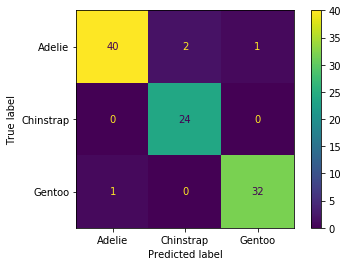

In [37]:
plot_confusion_matrix(model,X_test,y_test)

In [38]:
print(classification_report(y_test,base_pred))

              precision    recall  f1-score   support

      Adelie       0.98      0.93      0.95        43
   Chinstrap       0.92      1.00      0.96        24
      Gentoo       0.97      0.97      0.97        33

    accuracy                           0.96       100
   macro avg       0.96      0.97      0.96       100
weighted avg       0.96      0.96      0.96       100



In [39]:
model.feature_importances_

array([0.34257638, 0.04087096, 0.55208526, 0.00645261, 0.05801479,
       0.        , 0.        ])

In [40]:
pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['Feature Importance'])

,Feature Importance
culmen_length_mm,0.342576
culmen_depth_mm,0.040871
flipper_length_mm,0.552085
body_mass_g,0.006453
island_Dream,0.058015
island_Torgersen,0.000000
sex_MALE,0.000000


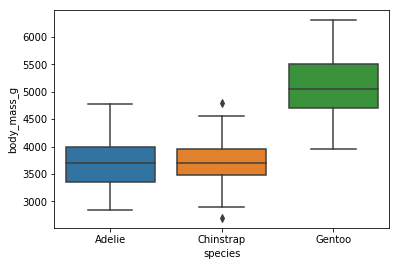

In [41]:
sns.boxplot(x='species',y='body_mass_g',data=df)

# Pruning the tree using cost complexity pruning method.
Choosing  alpha with cross validation.
# 

In [43]:
path=model.cost_complexity_pruning_path(X_train,y_train)

In [44]:
path

{'ccp_alphas': array([0.        , 0.00418717, 0.00424805, 0.00715308, 0.0248732 ,
        0.03670526, 0.19778832, 0.34929773]),
 'impurities': array([0.        , 0.00837433, 0.01687043, 0.02402351, 0.04889671,
        0.08560197, 0.28339029, 0.63268802])}

In [45]:
ccp_alphas=path.ccp_alphas

In [46]:
ccp_alphas

array([0.        , 0.00418717, 0.00424805, 0.00715308, 0.0248732 ,
       0.03670526, 0.19778832, 0.34929773])

In [49]:
from sklearn.model_selection import cross_val_score
import sklearn.metrics
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_we

In [53]:
accuracy_cv = []
for alpha in ccp_alphas:
    accuracy=cross_val_score(estimator= DecisionTreeClassifier(ccp_alpha=alpha),X=X_train,y=y_train,cv=5,scoring='accuracy')
    accuracy_cv.append(np.mean(accuracy))
    
output=pd.DataFrame(list(ccp_alphas),columns=['alpha'])
output['accuracy_CV']=accuracy_cv

output.head()

,alpha,accuracy_CV
0,0.000000,0.974191
1,0.004187,0.969843
2,0.004248,0.969843
3,0.007153,0.974191
4,0.024873,0.952544


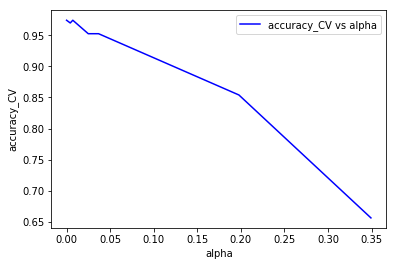

In [54]:
# Plotting the Accuracy vs Alpha
sns.lineplot(x='alpha', y='accuracy_CV', data=output , color='b', label="accuracy_CV vs alpha")
plt.show()

In [55]:
# Shows which row in the dataframe has the highest accuracy 
np.argmax(output['accuracy_CV'])


0

In [56]:
output.iloc[np.argmax(output['accuracy_CV']),]

alpha          0.000000
accuracy_CV    0.974191
Name: 0, dtype: float64

In [57]:
# Gets the optimal alpha from the dataframe and stores it in a variable called optimal_alpha
optimal_alpha = output.iloc[np.argmax(output['accuracy_CV']),0]
optimal_alpha

0.0

# Refit the Decision Tree classifier with optimal alpha


In [59]:
optimal_DT=DecisionTreeClassifier(ccp_alpha=optimal_alpha)

In [60]:
optimal_DT.fit(X_train,y_train)

DecisionTreeClassifier()

In [61]:
y_hat_opt=optimal_DT.predict(X_test)

In [62]:
#confusion matrix
print(confusion_matrix(y_test,y_hat_opt))

[[40  2  1]
 [ 3 21  0]
 [ 0  0 33]]


In [63]:
accuracy_score(y_test,y_hat_opt)

0.94

C:\Users\test\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


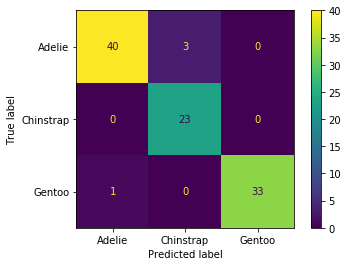

In [64]:
plot_confusion_matrix(model,X_test,y_hat_opt)

In [65]:
print(classification_report(y_test,y_hat_opt))

              precision    recall  f1-score   support

      Adelie       0.93      0.93      0.93        43
   Chinstrap       0.91      0.88      0.89        24
      Gentoo       0.97      1.00      0.99        33

    accuracy                           0.94       100
   macro avg       0.94      0.94      0.94       100
weighted avg       0.94      0.94      0.94       100



## Visualize Tree 

In [66]:
from sklearn.tree import plot_tree

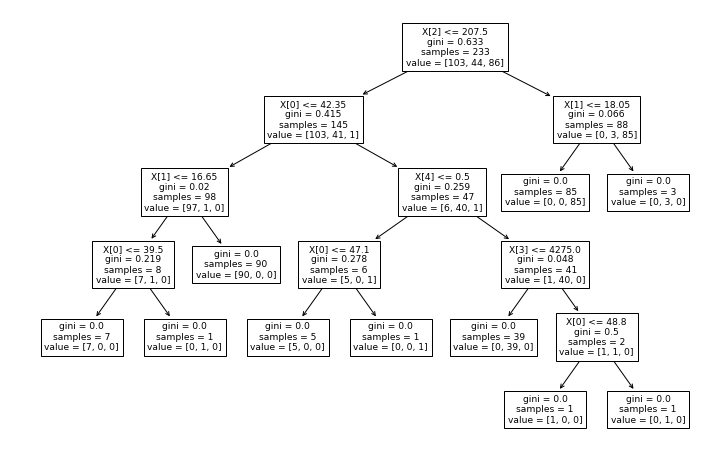

In [69]:
plt.figure(figsize=(12,8))
plot_tree(model);

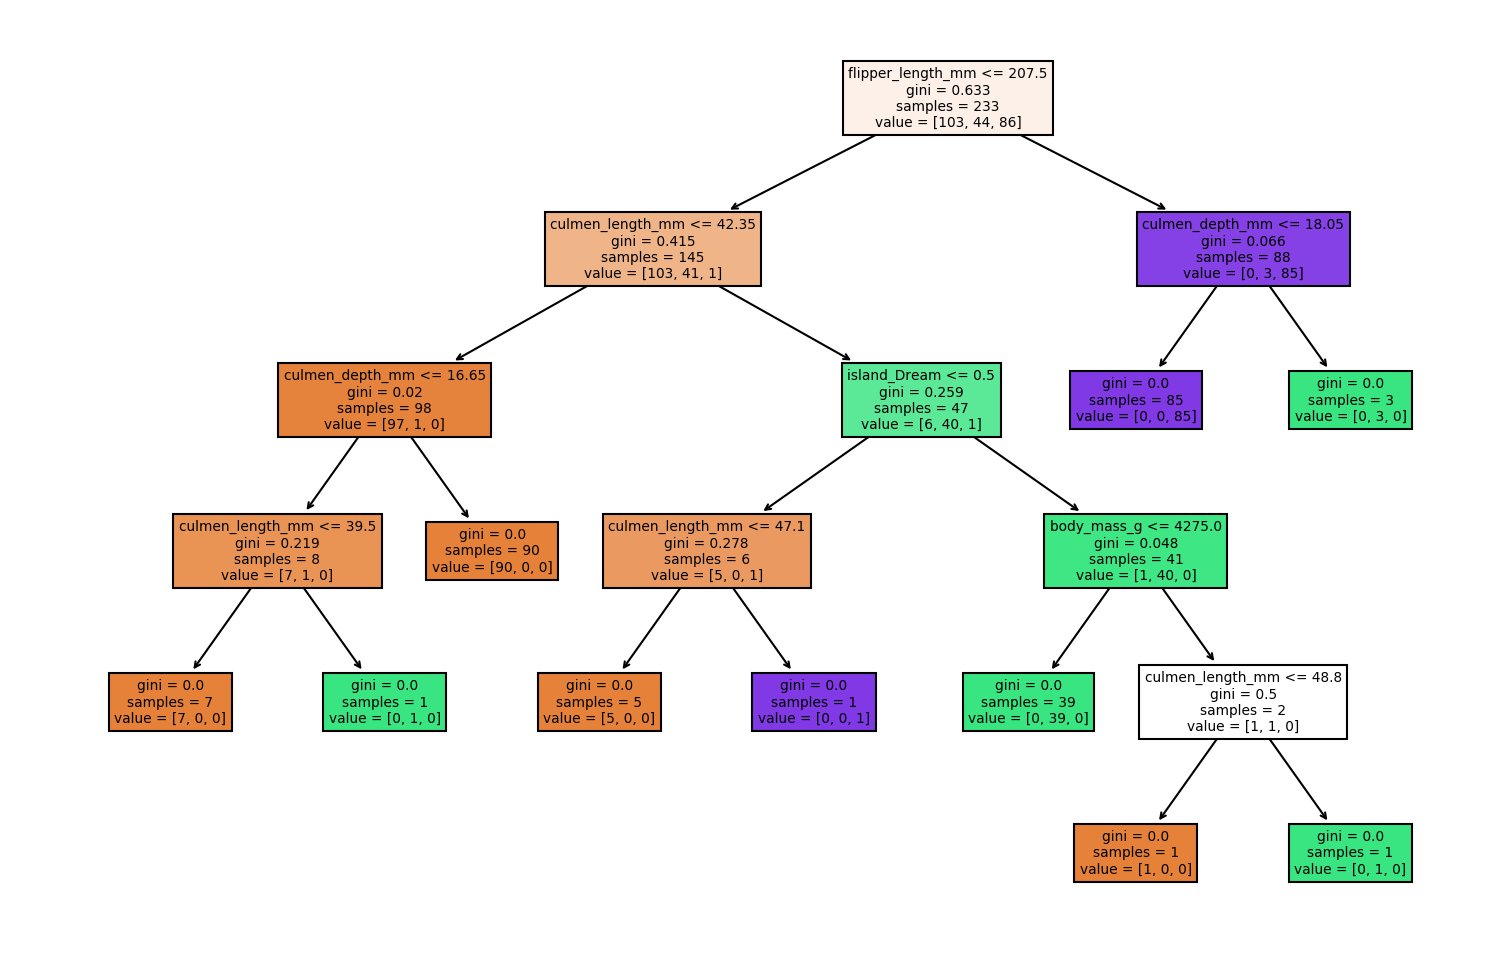

In [70]:
plt.figure(figsize=(12,8),dpi=150)
plot_tree(model,filled=True,feature_names=X.columns);

## Reporting Model

In [71]:
def report_model(model):
    model_preds=model.predict(X_test)
    print(classification_report(y_test,model_preds))
    print('\n')
    plt.figure(figsize=(12,8))
    plot_tree(model,filled=True,feature_names=X.columns)

In [72]:
pruned_tree=DecisionTreeClassifier(max_depth=2)
pruned_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

              precision    recall  f1-score   support

      Adelie       1.00      0.84      0.91        43
   Chinstrap       0.77      1.00      0.87        24
      Gentoo       0.97      0.97      0.97        33

    accuracy                           0.92       100
   macro avg       0.91      0.94      0.92       100
weighted avg       0.94      0.92      0.92       100





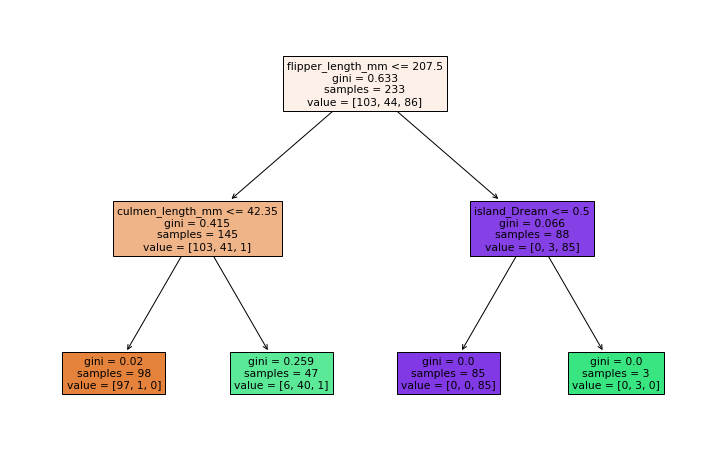

In [73]:
report_model(pruned_tree)

## Max Leaf Node 

In [74]:
pruned_tree=DecisionTreeClassifier(max_leaf_nodes=3)
pruned_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=3)

              precision    recall  f1-score   support

      Adelie       1.00      0.84      0.91        43
   Chinstrap       0.79      0.96      0.87        24
      Gentoo       0.91      0.97      0.94        33

    accuracy                           0.91       100
   macro avg       0.90      0.92      0.91       100
weighted avg       0.92      0.91      0.91       100





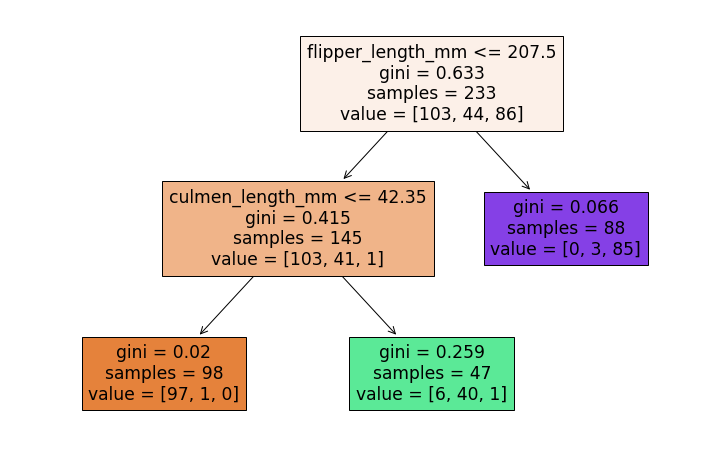

In [75]:
report_model(pruned_tree)

## Criterion 

In [76]:
entropy_tree=DecisionTreeClassifier(criterion='entropy')
entropy_tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

              precision    recall  f1-score   support

      Adelie       0.93      0.93      0.93        43
   Chinstrap       0.91      0.88      0.89        24
      Gentoo       0.97      1.00      0.99        33

    accuracy                           0.94       100
   macro avg       0.94      0.94      0.94       100
weighted avg       0.94      0.94      0.94       100





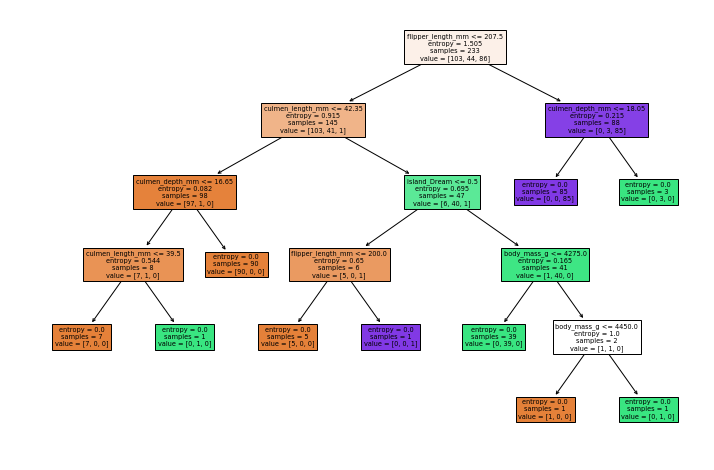

In [77]:
report_model(entropy_tree)

## Cross_Validation 

In [78]:
from sklearn.model_selection import cross_val_score

In [79]:
accuracy=cross_val_score(estimator=optimal_DT,X=X_train,y=y_train,cv=5,scoring='accuracy')

In [80]:
accuracy

array([0.9787234 , 0.9787234 , 0.9787234 , 0.89130435, 1.        ])

In [82]:
#average of 5 values
round(accuracy.mean(),3)

0.965

              precision    recall  f1-score   support

      Adelie       0.93      0.93      0.93        43
   Chinstrap       0.91      0.88      0.89        24
      Gentoo       0.97      1.00      0.99        33

    accuracy                           0.94       100
   macro avg       0.94      0.94      0.94       100
weighted avg       0.94      0.94      0.94       100





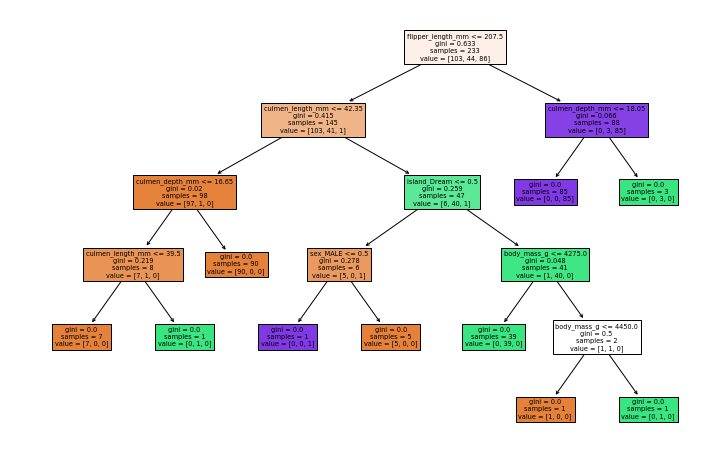

In [83]:
report_model(optimal_DT)

In [85]:
!pip install graphviz

conda 4.13.0 requires ruamel_yaml_conda>=0.11.14, which is not installed.
cryptography 3.3.2 has requirement cffi>=1.12, but you'll have cffi 1.11.5 which is incompatible.
You are using pip version 10.0.1, however version 22.2.2 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [86]:
from sklearn.tree import export_graphviz
from sklearn import tree

In [87]:
#saving image
import graphviz
# DOT data
dot_data = tree.export_graphviz(optimal_DT, out_file=None, 
                                feature_names=X_train.columns,  
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

ExecutableNotFound: failed to execute 'dot', make sure the Graphviz executables are on your systems' PATH